<a href="https://colab.research.google.com/github/momomendoza2476-max/SIMULACI-N-II/blob/main/MC_crudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy.stats as st

In [10]:

def g(x):
  return np.sqrt(np.arctan(x))

In [11]:
def mc_crudo(N):
    lista=[]
    for i in range(N):
        u=np.random.random()
        lista.append(g(u))
    return np.mean(lista)


In [12]:
N = 1000
rep = 30
alpha = 0.05

In [13]:
resultados = [mc_crudo(N) for _ in range(rep)]

In [14]:
media = np.mean(resultados)
varianza = np.var(resultados, ddof=1)
desv = np.sqrt(varianza)

In [15]:
t_crit = st.t.ppf(1 - alpha/2, df=rep-1)
margen_error = t_crit * desv / np.sqrt(rep)
ic = (media - margen_error, media + margen_error)

In [16]:
print(f"Media de resultados: {media}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desv}")
print(f"IC 95%: {ic}")

Media de resultados: 0.6303751589330022
Varianza: 2.931313292160674e-05
Desviación estándar: 0.005414160407820103
IC 95%: (np.float64(0.6283534782113295), np.float64(0.632396839654675))


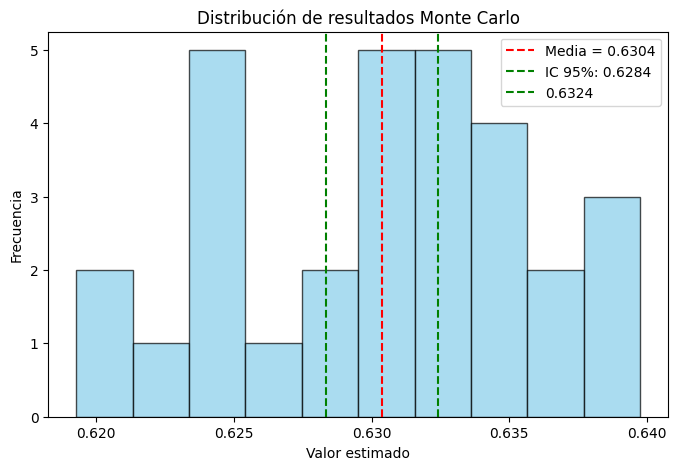

In [17]:
plt.figure(figsize=(8,5))
plt.hist(resultados, bins=10, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(media, color="red", linestyle="--", label=f"Media = {media:.4f}")
plt.axvline(ic[0], color="green", linestyle="--", label=f"IC 95%: {ic[0]:.4f}")
plt.axvline(ic[1], color="green", linestyle="--", label=f"{ic[1]:.4f}")
plt.title("Distribución de resultados Monte Carlo")
plt.xlabel("Valor estimado")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()